In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer

Without sentiment

In [2]:
df = pd.read_json("train.json")
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [3]:
rows = len(df)
columns = len(df.columns)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 49352
Number of columns: 15


In [4]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [34]:
#Removal of outlier
upper_bound = np.percentile(df["price"].values, 99.9)
df_filtered = df[df["price"] <= upper_bound]

In [35]:
# Count the number of instances for each class in 'interest_level'
interest_counts = df_filtered['interest_level'].value_counts()
print("Class Distribution for 'interest_level':")
print(interest_counts)

Class Distribution for 'interest_level':
low       34201
medium    11229
high       3838
Name: interest_level, dtype: int64


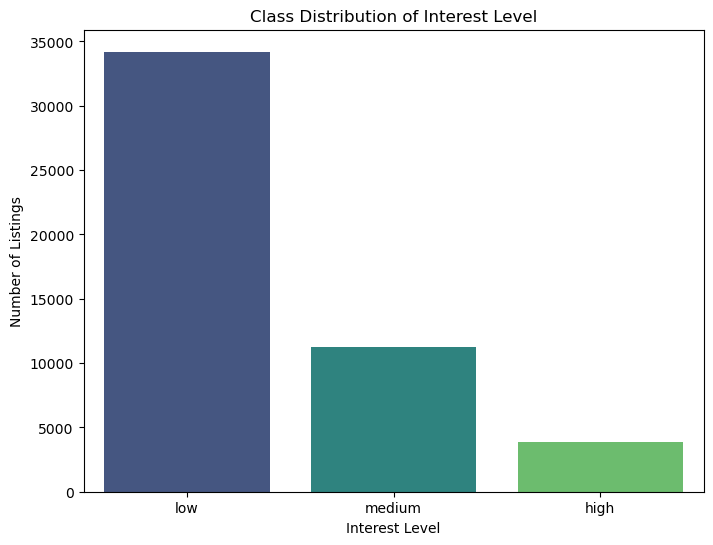

In [36]:
# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=interest_counts.index, y=interest_counts.values, palette='viridis')
plt.xlabel('Interest Level')
plt.ylabel('Number of Listings')
plt.title('Class Distribution of Interest Level')
plt.show()

In [37]:
# Imbalance Ratio
imbalance_ratio = interest_counts.max() / interest_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 8.91


The dataset is imbalanced.
Balanced Class Distribution for 'interest_level':
medium    34201
low       34201
high      34201
Name: interest_level, dtype: int64


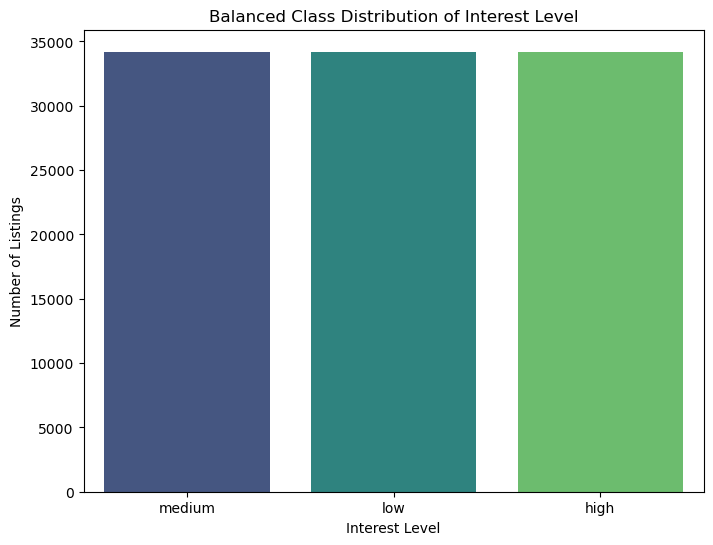

In [38]:
# Analyze if the data is imbalanced
if imbalance_ratio > 1.5:
    print("The dataset is imbalanced.") #printing imbalace ratio which shows dataframe is highly imbalanced

    # Separate each class into different DataFrames
    df_low = df_filtered[df_filtered['interest_level'] == 'low']
    df_medium = df_filtered[df_filtered['interest_level'] == 'medium']
    df_high = df_filtered[df_filtered['interest_level'] == 'high']

    # Upsample minority classes
    df_medium_upsampled = resample(df_medium,
                                   replace=True,    # Sample with replacement
                                   n_samples=len(df_low), # Match number of samples in majority class
                                   random_state=42) # Reproducible results
    df_high_upsampled = resample(df_high,
                                 replace=True,
                                 n_samples=len(df_low),
                                 random_state=42)

    # Combining the 3 dataframes into one
    df_balanced = pd.concat([df_low, df_medium_upsampled, df_high_upsampled])

    # Shuffling the balanced dataset to make it balanced
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # Display the new class distribution
    balanced_counts = df_balanced['interest_level'].value_counts()
    print("Balanced Class Distribution for 'interest_level':")
    print(balanced_counts)

    # Plot the new class distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette='viridis')
    plt.xlabel('Interest Level')
    plt.ylabel('Number of Listings')
    plt.title('Balanced Class Distribution of Interest Level')
    plt.show()
else:
    print("The dataset is balanced.")


In [39]:
rows = len(df_balanced)
columns = len(df_balanced.columns)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 102603
Number of columns: 23


In [40]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day,hour,weekday,quarter,final_sentiment
count,49317.000000,49317.000000,49317.000000,4.931700e+04,49317.000000,49317.000000,49317.0,49317.000000,49317.000000,49317.0,49317.000000,49317.0,49317.000000
mean,1.210688,1.540361,40.741540,7.024068e+06,-73.955698,3641.196018,2016.0,5.014883,15.208224,0.0,2.922217,2.0,0.001663
std,0.496267,1.113472,0.638761,1.262686e+05,1.178329,2106.068893,0.0,0.824427,8.280865,0.0,1.784805,0.0,0.055492
min,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,43.000000,2016.0,4.000000,1.000000,0.0,0.000000,2.0,0.000000
25%,1.000000,1.000000,40.728300,6.915945e+06,-73.991700,2500.000000,2016.0,4.000000,8.000000,0.0,1.000000,2.0,0.000000
50%,1.000000,1.000000,40.751800,7.021070e+06,-73.977900,3150.000000,2016.0,5.000000,15.000000,0.0,3.000000,2.0,0.000000
75%,1.000000,2.000000,40.774300,7.128740e+06,-73.954800,4100.000000,2016.0,6.000000,22.000000,0.0,4.000000,2.0,0.000000
max,10.000000,8.000000,44.883500,7.753784e+06,0.000000,30000.000000,2016.0,6.000000,31.000000,0.0,6.000000,2.0,2.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49317 entries, 4 to 124009
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bathrooms        49317 non-null  float64       
 1   bedrooms         49317 non-null  int64         
 2   building_id      49317 non-null  object        
 3   created          49317 non-null  object        
 4   description      49317 non-null  object        
 5   display_address  49317 non-null  object        
 6   features         49317 non-null  object        
 7   latitude         49317 non-null  float64       
 8   listing_id       49317 non-null  int64         
 9   longitude        49317 non-null  float64       
 10  manager_id       49317 non-null  object        
 11  photos           49317 non-null  object        
 12  price            49317 non-null  int64         
 13  street_address   49317 non-null  object        
 14  interest_level   49317 non-null  obje

In [ ]:
output_filename = 'balanced_data_without_sentiment.csv'
df_balanced.to_csv(output_filename, index=False) # saving balanced dataset to output JSON file

print(f"\nResults saved to {output_filename}")
print("\nColumns in final CSV:")
print(df_balanced.columns.tolist())
print("\nSample of final predictions:")


Results saved to balanced_data_without_sentiment.csv

Columns in final CSV:
['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level', 'date', 'year', 'month', 'day', 'hour', 'weekday', 'quarter', 'final_sentiment']

Sample of final predictions:


In [44]:
df_balanced_without_sentiment = pd.read_csv('balanced_data_without_sentiment.csv')
df_balanced_without_sentiment.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,street_address,interest_level,date,year,month,day,hour,weekday,quarter,final_sentiment
0,1.0,1,a7a6fd7e64fefbdb002657a62208907e,2016-05-23 02:59:34,JUST HIT THE MARKET - GREAT DEAL!AVAILABLE ON ...,184 Eagle Street,"['Elevator', 'Laundry in Building', 'Laundry i...",40.7352,7055174,-73.9534,...,184 Eagle Street,medium,2016-05-23,2016,5,23,0,0,2,0
1,4.0,4,0806637323769972ab477841717fc941,2016-04-05 06:01:37,Stunning 50th floor Corner 4 bedroom / four ba...,5th Ave.,"['Roof Deck', 'Dining Room', 'Doorman', 'Fitne...",40.7912,6825857,-73.9523,...,1214 5th Ave.,low,2016-04-05,2016,4,5,0,1,2,0
2,1.0,3,8954ef67fa7a4a8434f724e90e80db13,2016-05-05 05:42:11,Extra Large 3 Bedroom Apartment offering more ...,1st Avenue,"['Dining Room', 'Elevator', 'Dishwasher', 'Har...",40.7350,6969781,-73.9792,...,350 1st Avenue,low,2016-05-05,2016,5,5,0,3,2,0
3,2.0,3,6c160faba23da362ca44345294079e2a,2016-04-23 02:24:13,"Available Immediately -- 3 Bedroom, on Chelsea...",W 19 Street,"['Elevator', 'Dogs Allowed', 'Cats Allowed']",40.7424,6915181,-73.9999,...,274 W 19 Street,low,2016-04-23,2016,4,23,0,5,2,0
4,1.0,2,1bd24d2906d981ec60703de71921dd2e,2016-06-22 10:00:36,"CALL OR TEXT 535-480-7016.\r\rLight-filled, ap...",West 100's/Near Central Park,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee']",40.7983,7201769,-73.9631,...,82 West 105th street,high,2016-06-22,2016,6,22,0,2,2,0


With sentiment

In [51]:
df = pd.read_json("sentiment_analysis_results.json")
df = df.drop(columns=['processed_description', 'processed_description_distilBERT', 'interest_level_mapped', 'sentiment_distilBERT'])
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,...,street_address,interest_level,date,year,month,day,hour,weekday,quarter,final_sentiment
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,...,145 Borinquen Place,medium,2016-06-16,2016,6,16,0,3,2,0
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,...,230 East 44th,low,2016-06-01,2016,6,1,0,2,2,0
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,...,405 East 56th Street,medium,2016-06-14,2016,6,14,0,1,2,0
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,...,792 Metropolitan Avenue,medium,2016-06-24,2016,6,24,0,4,2,0
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,...,340 East 34th Street,low,2016-06-28,2016,6,28,0,1,2,0


In [52]:
rows = len(df)
columns = len(df.columns)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 49317
Number of columns: 23


In [53]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day,hour,weekday,quarter,final_sentiment
count,49317.000000,49317.000000,49317.000000,4.931700e+04,49317.000000,49317.000000,49317.0,49317.000000,49317.000000,49317.0,49317.000000,49317.0,49317.000000
mean,1.210688,1.540361,40.741540,7.024068e+06,-73.955698,3641.196018,2016.0,5.014883,15.208224,0.0,2.922217,2.0,0.001663
std,0.496267,1.113472,0.638761,1.262686e+05,1.178329,2106.068893,0.0,0.824427,8.280865,0.0,1.784805,0.0,0.055492
min,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,43.000000,2016.0,4.000000,1.000000,0.0,0.000000,2.0,0.000000
25%,1.000000,1.000000,40.728300,6.915945e+06,-73.991700,2500.000000,2016.0,4.000000,8.000000,0.0,1.000000,2.0,0.000000
50%,1.000000,1.000000,40.751800,7.021070e+06,-73.977900,3150.000000,2016.0,5.000000,15.000000,0.0,3.000000,2.0,0.000000
75%,1.000000,2.000000,40.774300,7.128740e+06,-73.954800,4100.000000,2016.0,6.000000,22.000000,0.0,4.000000,2.0,0.000000
max,10.000000,8.000000,44.883500,7.753784e+06,0.000000,30000.000000,2016.0,6.000000,31.000000,0.0,6.000000,2.0,2.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49317 entries, 4 to 124009
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bathrooms        49317 non-null  float64       
 1   bedrooms         49317 non-null  int64         
 2   building_id      49317 non-null  object        
 3   created          49317 non-null  object        
 4   description      49317 non-null  object        
 5   display_address  49317 non-null  object        
 6   features         49317 non-null  object        
 7   latitude         49317 non-null  float64       
 8   listing_id       49317 non-null  int64         
 9   longitude        49317 non-null  float64       
 10  manager_id       49317 non-null  object        
 11  photos           49317 non-null  object        
 12  price            49317 non-null  int64         
 13  street_address   49317 non-null  object        
 14  interest_level   49317 non-null  obje

In [55]:
#Removal of outlier
upper_bound = np.percentile(df["price"].values, 99.9)
df_filtered = df[df["price"] <= upper_bound]

In [56]:
# Count the number of instances for each class in 'interest_level'
interest_counts = df_filtered['interest_level'].value_counts()
print("Class Distribution for 'interest_level':")
print(interest_counts)

Class Distribution for 'interest_level':
low       34201
medium    11229
high       3838
Name: interest_level, dtype: int64


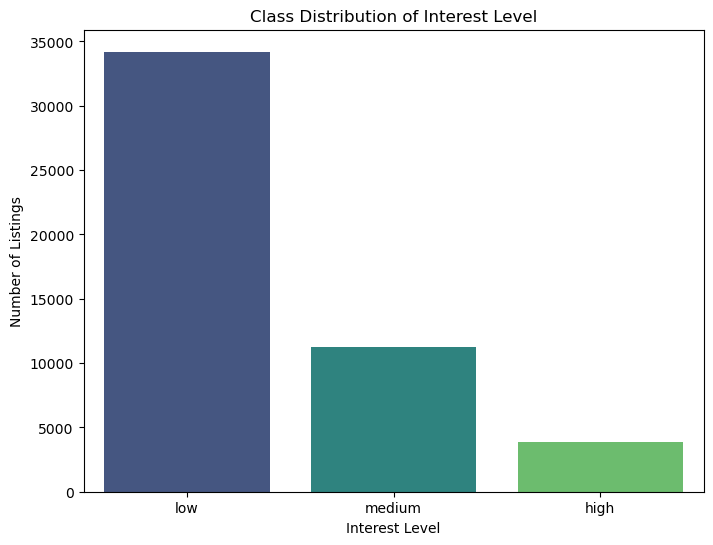

In [57]:
# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=interest_counts.index, y=interest_counts.values, palette='viridis')
plt.xlabel('Interest Level')
plt.ylabel('Number of Listings')
plt.title('Class Distribution of Interest Level')
plt.show()

In [58]:
# Imbalance Ratio
imbalance_ratio = interest_counts.max() / interest_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 8.91


The dataset is imbalanced.
Balanced Class Distribution for 'interest_level':
medium    34201
low       34201
high      34201
Name: interest_level, dtype: int64


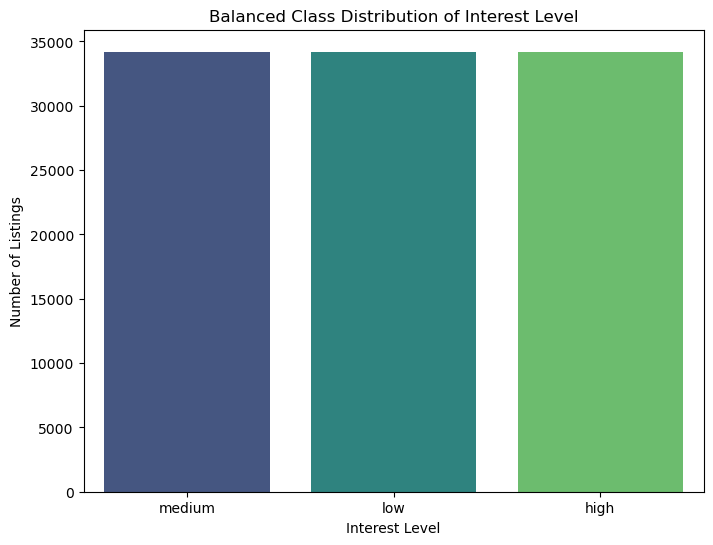

In [59]:
# Analyze if the data is imbalanced
if imbalance_ratio > 1.5:
    print("The dataset is imbalanced.") #printing imbalace ratio which shows dataframe is highly imbalanced

    # Separate each class into different DataFrames
    df_low = df_filtered[df_filtered['interest_level'] == 'low']
    df_medium = df_filtered[df_filtered['interest_level'] == 'medium']
    df_high = df_filtered[df_filtered['interest_level'] == 'high']

    # Upsample minority classes
    df_medium_upsampled = resample(df_medium,
                                   replace=True,    # Sample with replacement
                                   n_samples=len(df_low), # Match number of samples in majority class
                                   random_state=42) # Reproducible results
    df_high_upsampled = resample(df_high,
                                 replace=True,
                                 n_samples=len(df_low),
                                 random_state=42)

    # Combining the 3 dataframes into one
    df_balanced = pd.concat([df_low, df_medium_upsampled, df_high_upsampled])

    # Shuffling the balanced dataset to make it balanced
    df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

    # Display the new class distribution
    balanced_counts = df_balanced['interest_level'].value_counts()
    print("Balanced Class Distribution for 'interest_level':")
    print(balanced_counts)

    # Plot the new class distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette='viridis')
    plt.xlabel('Interest Level')
    plt.ylabel('Number of Listings')
    plt.title('Balanced Class Distribution of Interest Level')
    plt.show()
else:
    print("The dataset is balanced.")


In [60]:
rows = len(df_balanced)
columns = len(df_balanced.columns)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 102603
Number of columns: 23


In [61]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,year,month,day,hour,weekday,quarter,final_sentiment
count,49317.000000,49317.000000,49317.000000,4.931700e+04,49317.000000,49317.000000,49317.0,49317.000000,49317.000000,49317.0,49317.000000,49317.0,49317.000000
mean,1.210688,1.540361,40.741540,7.024068e+06,-73.955698,3641.196018,2016.0,5.014883,15.208224,0.0,2.922217,2.0,0.001663
std,0.496267,1.113472,0.638761,1.262686e+05,1.178329,2106.068893,0.0,0.824427,8.280865,0.0,1.784805,0.0,0.055492
min,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,43.000000,2016.0,4.000000,1.000000,0.0,0.000000,2.0,0.000000
25%,1.000000,1.000000,40.728300,6.915945e+06,-73.991700,2500.000000,2016.0,4.000000,8.000000,0.0,1.000000,2.0,0.000000
50%,1.000000,1.000000,40.751800,7.021070e+06,-73.977900,3150.000000,2016.0,5.000000,15.000000,0.0,3.000000,2.0,0.000000
75%,1.000000,2.000000,40.774300,7.128740e+06,-73.954800,4100.000000,2016.0,6.000000,22.000000,0.0,4.000000,2.0,0.000000
max,10.000000,8.000000,44.883500,7.753784e+06,0.000000,30000.000000,2016.0,6.000000,31.000000,0.0,6.000000,2.0,2.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49317 entries, 4 to 124009
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bathrooms        49317 non-null  float64       
 1   bedrooms         49317 non-null  int64         
 2   building_id      49317 non-null  object        
 3   created          49317 non-null  object        
 4   description      49317 non-null  object        
 5   display_address  49317 non-null  object        
 6   features         49317 non-null  object        
 7   latitude         49317 non-null  float64       
 8   listing_id       49317 non-null  int64         
 9   longitude        49317 non-null  float64       
 10  manager_id       49317 non-null  object        
 11  photos           49317 non-null  object        
 12  price            49317 non-null  int64         
 13  street_address   49317 non-null  object        
 14  interest_level   49317 non-null  obje

In [ ]:
output_filename = 'balanced_data_with_sentiment.csv'
df_balanced.to_csv(output_filename, index=False) # saving balanced dataset to output JSON file

print(f"\nResults saved to {output_filename}")
print("\nColumns in final CSV:")
print(df_balanced.columns.tolist())
print("\nSample of final predictions:")


Results saved to balanced_data_with_sentiment.csv

Columns in final CSV:
['bathrooms', 'bedrooms', 'building_id', 'created', 'description', 'display_address', 'features', 'latitude', 'listing_id', 'longitude', 'manager_id', 'photos', 'price', 'street_address', 'interest_level', 'date', 'year', 'month', 'day', 'hour', 'weekday', 'quarter', 'final_sentiment']

Sample of final predictions:


In [33]:
df_balanced_with_sentiment = pd.read_csv('balanced_data_with_sentiment.csv')
df_balanced_with_sentiment.head()

,bathrooms,bedrooms,building_id,created,display_address,latitude,listing_id,longitude,price,street_address,...,unit,view,viewing,views,walk,washer,website_redacted,west,windows,york
0,1.0,1.0,a7a6fd7e64fefbdb002657a62208907e,2016-05-23 02:59:34,184 Eagle Street,40.7352,7055174.0,-73.9534,2335.0,184 Eagle Street,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,4.0,0806637323769972ab477841717fc941,2016-04-05 06:01:37,5th Ave.,40.7912,6825857.0,-73.9523,17000.0,1214 5th Ave.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,8954ef67fa7a4a8434f724e90e80db13,2016-05-05 05:42:11,1st Avenue,40.7350,6969781.0,-73.9792,4195.0,350 1st Avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,3.0,6c160faba23da362ca44345294079e2a,2016-04-23 02:24:13,W 19 Street,40.7424,6915181.0,-73.9999,5175.0,274 W 19 Street,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,1bd24d2906d981ec60703de71921dd2e,2016-06-22 10:00:36,West 100's/Near Central Park,40.7983,7201769.0,-73.9631,2495.0,82 West 105th street,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
